In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

%load_ext lab_black

In [3]:
dtype_dict = {
    "bathrooms": float,
    "waterfront": int,
    "sqft_above": int,
    "sqft_living15": float,
    "grade": int,
    "yr_renovated": int,
    "price": float,
    "bedrooms": float,
    "zipcode": str,
    "long": float,
    "sqft_lot15": float,
    "sqft_living": float,
    "floors": str,
    "condition": int,
    "lat": float,
    "date": str,
    "sqft_basement": int,
    "yr_built": int,
    "id": str,
    "sqft_lot": int,
    "view": int,
}

# 4 Subsets

In [4]:
set1 = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_set_1_data.csv", dtype=dtype_dict
)
set2 = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_set_2_data.csv", dtype=dtype_dict
)
set3 = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_set_3_data.csv", dtype=dtype_dict
)
set4 = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_set_4_data.csv", dtype=dtype_dict
)

In [5]:
# build a degree-15 model for each set
feature = "sqft_living"
target = "price"


def degree15Model(set):
    x_reshape = set[feature].values.reshape(-1, 1)

    poly = PolynomialFeatures(degree=15)
    poly.fit_transform(x_reshape)

    model = Pipeline([("poly", poly), ("linear", LinearRegression())])
    model.fit(x_reshape, set[target])

    return model

In [6]:
model1 = degree15Model(set1)
model2 = degree15Model(set2)
model3 = degree15Model(set3)
model4 = degree15Model(set4)

In [7]:
model1.named_steps["linear"].coef_

array([ 0.00000000e+00,  3.88271571e-49, -1.24969920e-55, -4.97841222e-60,
        1.33208608e-77,  1.43630528e-74,  1.10358333e-70,  8.37724029e-67,
        6.23411957e-63,  4.49156442e-59,  3.06938763e-55,  1.91749300e-51,
        1.01335180e-47,  3.62176959e-44, -5.63501661e-48,  2.18641116e-52])

In [8]:
model2.named_steps["linear"].coef_

array([ 0.00000000e+00,  4.16469336e-39, -2.11074739e-44,  3.60915476e-50,
        3.31176796e-74,  6.21497508e-62,  8.25702274e-59,  3.63405250e-55,
        1.50000197e-51,  5.74592817e-48,  1.95333717e-44,  5.38298760e-41,
        9.38615251e-38, -3.62721938e-41,  4.64302459e-45, -1.96650591e-49])

In [17]:
model3.named_steps["linear"].coef_

array([ 0.00000000e+00, -6.98224905e-49,  2.60151372e-55, -7.96545956e-59,
        7.30952961e-76,  6.72328695e-73,  4.27894908e-69,  2.68009626e-65,
        1.63911362e-61,  9.66435015e-58,  5.38044653e-54,  2.72563636e-50,
        1.16253248e-46,  3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

In [18]:
model4.named_steps["linear"].coef_

array([ 0.00000000e+00,  3.65552147e-39,  4.44334044e-45,  4.78645739e-50,
       -4.17619486e-53,  2.25426862e-61,  3.14302702e-58,  1.27048698e-54,
        4.87781320e-51,  1.73515974e-47,  5.46948904e-44,  1.39558498e-40,
        2.24993273e-37, -9.43750295e-41,  1.31544835e-44, -6.09033785e-49])

In [15]:
# extract test data
partial = test[[feature, target]].sort_values(by=feature)
x = partial[feature]
y = partial[target]


def fittedLine(x, model):
    coef = np.append(
        model.named_steps["linear"].coef_[-1:0:-1],
        model.named_steps["linear"].intercept_,
    )
    poly = np.poly1d(coef)
    fittedY = poly(x)
    return (fittedY, poly)


def plotResults(model):
    x_reshape = x.values.reshape(-1, 1)
    pred = model.predict(x_reshape)

    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

    # true data
    axes[0].scatter(x, y, c="orange")
    # predicted regression line
    fittedY, poly = fittedLine(x, model)
    axes[0].plot(x.values, fittedY)

    # true data
    axes[1].scatter(x, y, c="orange")
    # predicted data
    axes[1].scatter(x.values, pred)

    plt.tight_layout()
    plt.savefig("../../docs/assets/img/reg_1.png")
    plt.show()

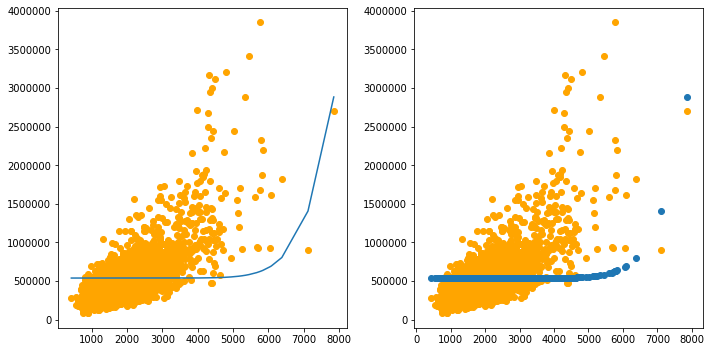

In [12]:
plotResults(model1)

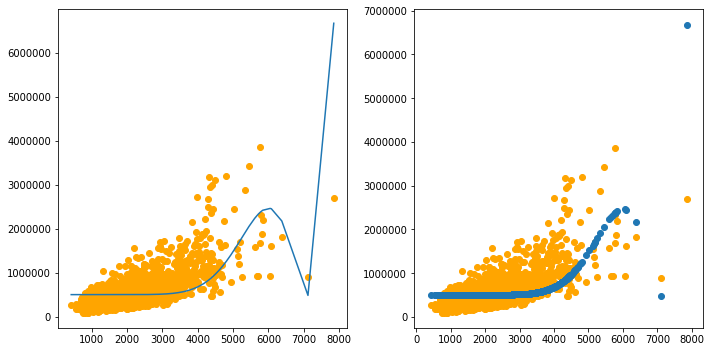

In [16]:
plotResults(model2)

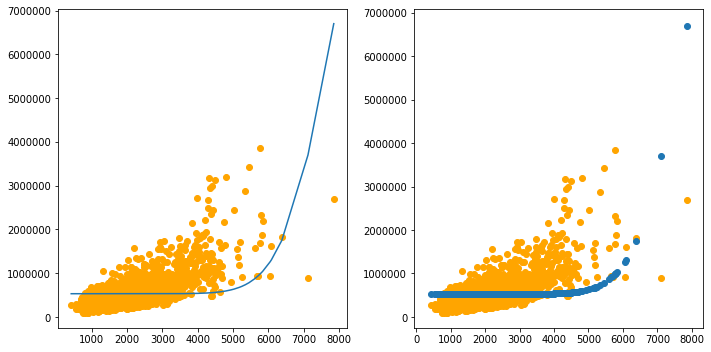

In [24]:
plotResults(model3)

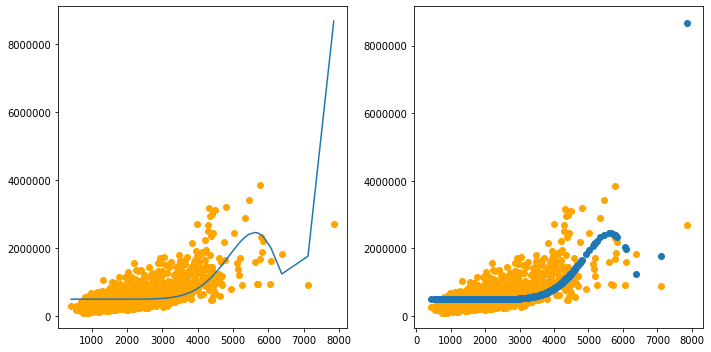

In [25]:
plotResults(model4)

# Validation

In [10]:
test = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_test_data.csv", dtype=dtype_dict
)
train = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_test_data.csv", dtype=dtype_dict
)
valid = pd.read_csv(
    "housing-data_polynomial/wk3_kc_house_test_data.csv", dtype=dtype_dict
)

In [69]:
# build a polynomial model
feature = "sqft_living"
target = "price"

train_x_reshape = train[feature].values.reshape(-1, 1)
train_y = train[target]

valid_partial = valid[[feature, target]].sort_values(by=feature)
valid_x_reshape = valid_partial[feature].values.reshape(-1, 1)
valid_y = valid_partial[target]


def degreeModel(degree):
    poly = PolynomialFeatures(degree)
    poly.fit_transform(train_x_reshape)

    model = Pipeline([("poly", poly), ("linear", LinearRegression())])
    model.fit(train_x_reshape, train_y)

    pred = model.predict(valid_x_reshape)
    coef = model.named_steps["linear"].coef_
    mse = metrics.mean_squared_error(valid_y, pred)

    return dict(zip(("model", "pred", "coef", "mse"), (model, pred, coef, mse)))

In [70]:
models = [degreeModel(i) for i in range(1, 16)]
mses = [m["mse"] for m in models]

In [71]:
mses

[64178305191.33404,
 60850863580.515915,
 59389462676.882286,
 59102574229.608604,
 59000018463.3463,
 58565152824.073494,
 58372782085.45278,
 58637675440.633194,
 59512316265.08522,
 61217156861.05792,
 63777745707.563484,
 67025389299.438194,
 70788452083.61533,
 74962945361.86769,
 79469830378.52495]

In [56]:
mses.index(min(mses))

6

In [57]:
models[6]

{'model': Pipeline(memory=None,
          steps=[('poly',
                  PolynomialFeatures(degree=7, include_bias=True,
                                     interaction_only=False, order='C')),
                 ('linear',
                  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False))],
          verbose=False),
 'pred': array([ 353073.31801487,  353512.67654908,  353562.18966645, ...,
        1675505.02343613, 1598927.83918983, 2468077.85130973]),
 'mse': 58372782085.45278}

In [62]:
best_model = models[6]
test_x_reshape = test[feature].values.reshape(-1, 1)
test_y = test[target]

In [63]:
"{:e}".format(metrics.mean_squared_error(best_model["pred"], test_y))

'1.853898e+11'

In [64]:
"{:e}".format(metrics.mean_squared_error(best_model["pred"], test_y) - models[6]["mse"])

'1.270170e+11'

In [72]:
models[3]["coef"]

array([ 0.00000000e+00,  8.35298347e+01, -3.33343422e-02,  2.95539734e-05,
       -2.99495418e-09])

In [73]:
models[4]["coef"]

array([ 0.00000000e+00, -2.82696834e-05, -4.53519144e-02,  5.50005816e-05,
       -9.39896603e-09,  4.55613982e-13])